In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

loading the data set

In [4]:
import os
import csv

def create_csv(dataset_path, csv_filename):
    with open(csv_filename, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['Filepath', 'Label'])

        for class_folder in os.listdir(dataset_path):
            class_path = os.path.join(dataset_path, class_folder)
            if os.path.isdir(class_path):
                for image_file in os.listdir(class_path):
                    image_path = os.path.join(class_path, image_file)
                    label = class_folder  # assuming the folder name is the label
                    csvwriter.writerow([image_path, label])

# Create CSV for training set
create_csv('datasets/training_set', 'train_labels.csv')

# Create CSV for test set
create_csv('datasets/test_set', 'test_labels.csv')


In [39]:
def load_dataset():
    # Load the CSV files using Pandas
    train_dataset = pd.read_csv('train_labels.csv')
    test_dataset = pd.read_csv('test_labels.csv')

    # Extract features (file paths) and labels
    train_set_x_orig = np.array(train_dataset['Filepath'])
    train_set_y_orig = np.array(train_dataset['Label'])

    test_set_x_orig = np.array(test_dataset['Filepath'])
    test_set_y_orig = np.array(test_dataset['Label'])

    # Extract classes
    classes = np.unique(train_set_y_orig)

    # Reshape labels
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


#Example usage of above code 
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

[[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]]


In [41]:
x = train_set_y_orig
print(len(x))


1


In [37]:
x   = train_set_y_orig
print(len(x))

1


now checking the shape of the data stored in the varaibles

In [8]:
x2 = np.array(train_set_x_orig)
print(x2)


['datasets/training_set\\cats\\cat_1.png'
 'datasets/training_set\\cats\\cat_10.png'
 'datasets/training_set\\cats\\cat_2.png'
 'datasets/training_set\\cats\\cat_3.png'
 'datasets/training_set\\cats\\cat_4.png'
 'datasets/training_set\\cats\\cat_5.png'
 'datasets/training_set\\cats\\cat_6.png'
 'datasets/training_set\\cats\\cat_7.png'
 'datasets/training_set\\cats\\cat_8.png'
 'datasets/training_set\\cats\\cat_9.png'
 'datasets/training_set\\dogs\\dog9.png'
 'datasets/training_set\\dogs\\dog_1.png'
 'datasets/training_set\\dogs\\dog_2.png'
 'datasets/training_set\\dogs\\dog_3.png'
 'datasets/training_set\\dogs\\dog_4.png'
 'datasets/training_set\\dogs\\dog_5.png'
 'datasets/training_set\\dogs\\dog_6.png'
 'datasets/training_set\\dogs\\dog_7.png'
 'datasets/training_set\\dogs\\dog_8.png']


As the answer is 1 it indicates that the array is a 1d array which contains all the labels of images wether it is cat or a dog

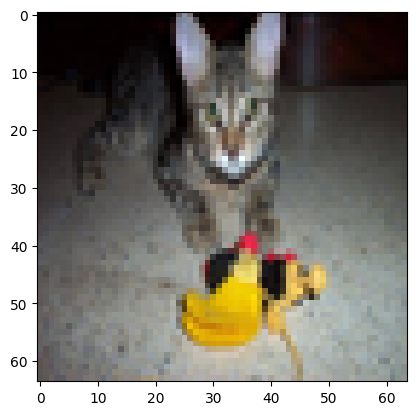

In [9]:
# Example of a picture
import matplotlib.pyplot as plt

index = 5
plt.imshow(plt.imread(train_set_x_orig[index]))



In [10]:
from PIL import Image
import numpy as np

# Assuming train_set_x is a 1D array containing file paths of training images
for file_path in train_set_x_orig:
    # Load the image using PIL
    image = Image.open(file_path)

    # Get and print the dimensions of the image
    width, height = image.size
    print(f"Image at '{file_path}' has dimensions: {width} x {height}")


Image at 'datasets/training_set\cats\cat_1.png' has dimensions: 64 x 64
Image at 'datasets/training_set\cats\cat_10.png' has dimensions: 64 x 64
Image at 'datasets/training_set\cats\cat_2.png' has dimensions: 64 x 64
Image at 'datasets/training_set\cats\cat_3.png' has dimensions: 64 x 64
Image at 'datasets/training_set\cats\cat_4.png' has dimensions: 64 x 64
Image at 'datasets/training_set\cats\cat_5.png' has dimensions: 64 x 64
Image at 'datasets/training_set\cats\cat_6.png' has dimensions: 64 x 64
Image at 'datasets/training_set\cats\cat_7.png' has dimensions: 64 x 64
Image at 'datasets/training_set\cats\cat_8.png' has dimensions: 64 x 64
Image at 'datasets/training_set\cats\cat_9.png' has dimensions: 64 x 64
Image at 'datasets/training_set\dogs\dog9.png' has dimensions: 64 x 64
Image at 'datasets/training_set\dogs\dog_1.png' has dimensions: 64 x 64
Image at 'datasets/training_set\dogs\dog_2.png' has dimensions: 64 x 64
Image at 'datasets/training_set\dogs\dog_3.png' has dimensions: 

In [11]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x_orig.shape))

Number of training examples: m_train = 19
Number of testing examples: m_test = 19
train_set_x shape: (19,)


In [12]:
#computing value of num_px
from PIL import Image

# Example: Load the first image in train_set_x_orig
first_image_path = train_set_x_orig[0]
first_image = Image.open(first_image_path)

# Get the dimensions of the first image
num_px_height, num_px_width = first_image.size

# Print the dimensions
print("Height/Width of each image: num_px =", num_px_height, "x", num_px_width)
num_px = num_px_height
print(num_px)

Height/Width of each image: num_px = 64 x 64
64


In [13]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = 64
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y_orig.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y_orig.shape))

Number of training examples: m_train = 19
Number of testing examples: m_test = 19
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (19,)
train_set_y shape: (1, 19)
test_set_x shape: (19,)
test_set_y shape: (1, 19)


In [14]:
from PIL import Image
import numpy as np
import os

# Define the target size
target_size = (64, 64)

# Function to load and resize an image
def load_and_resize(file_path):
    return np.array(Image.open(file_path).resize(target_size, Image.ANTIALIAS))

# Specify the path to the datasets folder"
datasets_path = 'C:/Users/HP/Downloads/neural networks and deep learning(coursera)/week2/Logistic regression/datasets'

# Get the paths to the train and test folders
train_path = os.path.join(datasets_path, 'training_set')
test_path = os.path.join(datasets_path, 'test_set')

# Get the list of file paths in train_set_x_orig
train_set_x_orig = [os.path.join(root, file) for root, dirs, files in os.walk(train_path) for file in files]

# Reshape images in train_set_x_orig
resized_train_set_x = np.array([load_and_resize(file_path) for file_path in train_set_x_orig])
resized_test_set_x = np.array([load_and_resize(file_path) for file_path in test_set_x_orig])
# Print the shapes of the resized arrays
print("Number of training examples: m_train =", len(train_set_x_orig))
print("Height/Width of each image: num_px =", target_size[0])
print("Each image is of size:", target_size + (3,))
print("Resized train_set_x shape:", resized_train_set_x.shape)




Number of training examples: m_train = 19
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
Resized train_set_x shape: (19, 64, 64, 3)


C:\Users\HP\AppData\Local\Temp\ipykernel_16512\3964711535.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  return np.array(Image.open(file_path).resize(target_size, Image.ANTIALIAS))


resized the arrays by loading each image and create a NumPy array containing the pixel values.

In [15]:
m_train = resized_train_set_x.shape[0]
m_test =  resized_train_set_x.shape[0]
num_px = resized_train_set_x.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(resized_train_set_x.shape))
print ("train_set_x shape: " + str(resized_test_set_x.shape))
print ("train_set_y shape: " + str(train_set_y_orig.shape))
print ("test_set_y shape: " + str(test_set_y_orig.shape))


Number of training examples: m_train = 19
Number of testing examples: m_test = 19
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (19, 64, 64, 3)
train_set_x shape: (19, 64, 64, 3)
train_set_y shape: (1, 19)
test_set_y shape: (1, 19)


In [16]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = resized_train_set_x.reshape(resized_train_set_x.shape[1]*resized_train_set_x.shape[2]*resized_train_set_x.shape[3],resized_train_set_x.shape[0])
test_set_x_flatten = resized_train_set_x.reshape(resized_train_set_x.shape[1]*resized_train_set_x.shape[2]*resized_train_set_x.shape[3],resized_train_set_x.shape[0])
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y_orig.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y_orig.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 19)
train_set_y shape: (1, 19)
test_set_x_flatten shape: (12288, 19)
test_set_y shape: (1, 19)
sanity check after reshaping: [169 189 204 210 196]


the next step is standarisation . basically this is performed so that the data can have mean of 0 and standard deviation of 1 . and also to have consistency of scale 

In [17]:
train_set_x = train_set_x_flatten / 255.0
test_set_x = test_set_x_flatten / 255.0
print(train_set_x)

[[0.6627451  0.63921569 0.63529412 ... 0.7254902  0.67843137 0.71764706]
 [0.74117647 0.69411765 0.73333333 ... 0.79215686 0.81568627 0.81960784]
 [0.8        0.81960784 0.83529412 ... 0.82352941 0.84705882 0.83137255]
 ...
 [0.70980392 0.84313725 0.36862745 ... 0.78431373 0.33333333 0.7372549 ]
 [0.88235294 0.34509804 0.70980392 ... 0.29019608 0.71764706 0.85098039]
 [0.38039216 0.70980392 0.83529412 ... 0.7254902  0.83529412 0.49803922]]


General Architecture of the learning algorithm

In [18]:
# implementation of sigmoid function
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [19]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [20]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [21]:

w, b = initialize_with_zeros(num_px)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
b = 0


But for image the dimension will be num_px*num_px*3 so again passing value

In [22]:

w, b = initialize_with_zeros(num_px)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
b = 0


In [23]:
#forward and backward propagation
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot (w.T,X) +b)
    Y = np.array(Y, dtype=float)  # Convert Y to a NumPy array with float data type
    A = np.array(A)

    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m  # compute cost
    # backward propagation
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m
    # end here . 
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


In [24]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [25]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [26]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067654


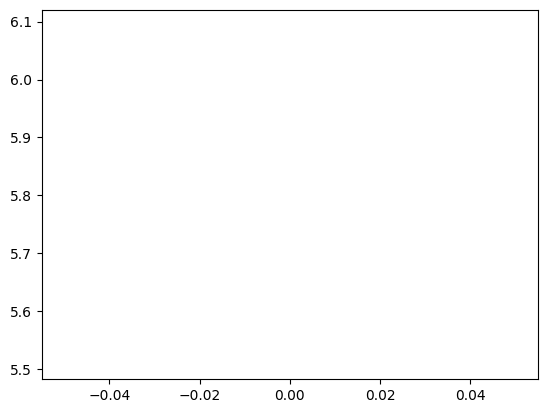

In [27]:
import matplotlib.pyplot as plt
plt.plot(costs)

In [28]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T,X) + b)           # Dimentions = (1, m)
    ### END CODE HERE ###
    
    #### WORKING SOLUTION 1: USING IF ELSE #### 
    #for i in range(A.shape[1]):
        ## Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        #if (A[0,i] >= 0.5):
        #    Y_prediction[0, i] = 1
        #else:
        #    Y_prediction[0, i] = 0
        ### END CODE HERE ###
        
    #### WORKING SOLUTION 2: ONE LINE ####
    #for i in range(A.shape[1]):
        ## Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        #Y_prediction[0, i] = 1 if A[0,i] >=0.5 else 0
        ### END CODE HERE ###
    
    #### WORKING SOLUTION 3: VECTORISED IMPLEMENTATION ####
    Y_prediction = (A >= 0.5) * 1.0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [29]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


Merge all functions to make a model

In [72]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [44]:
d = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 5000, learning_rate = 0.005, print_cost=False)

train accuracy: 100.0 %
test accuracy: 100.0 %


visualise an image 

Actual label (y) = 0
Predicted label = 0.0


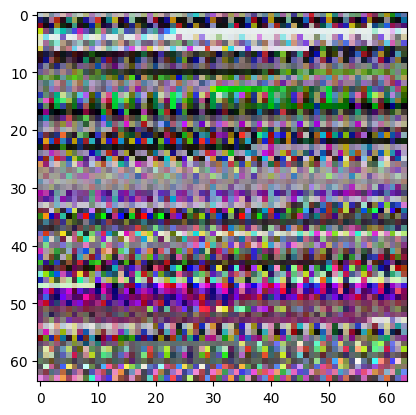

In [76]:
# Example of a picture that was wrongly classified.
index = 16
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
actual_label = test_set_y_orig[0, index]
predicted_label = d["Y_prediction_test"][0, index]

print("Actual label (y) = " + str(actual_label))
print("Predicted label = " + str(predicted_label))


plotting cost function and gradients

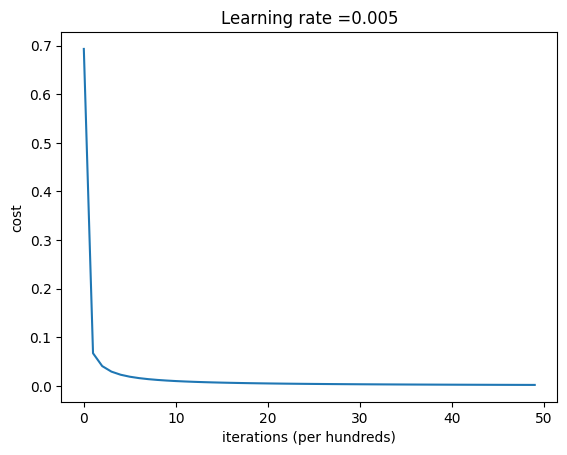

In [77]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()


The curve  plotted between the number of iterations and cost is a visualization of how a logistic regression model is learning. It shows the cost function, which measures how well your model is performing, as it updates its parameters over time.

The specific shape of the curve can tells a lot about how well your model is learning:

A steep descent followed by a gradual decline: This is the ideal scenario. It means that the  model is quickly learning and then fine-tuning its parameters to minimize the cost function.
A shallow descent followed by a plateau: This could mean that the model is not learning effectively, or that it has reached a local minimum in the cost function.
A curve that oscillates up and down: This could mean that the learning rate is too high. The model is taking too large steps and overshooting the minimum of the cost function.
In this case, the curve starts off with a steep descent, but then it starts to plateau around iteration 10. This suggests that themodel is learning well at first, but then it starts to get stuck in a local minimum. we can try decreasing the learning rate or using a different optimization algorithm to see if you can get the model to converge to a lower cost.

In [84]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [85]:
d = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 1000, learning_rate = 0.002, print_cost=False)

train accuracy: 100.0 %
test accuracy: 100.0 %


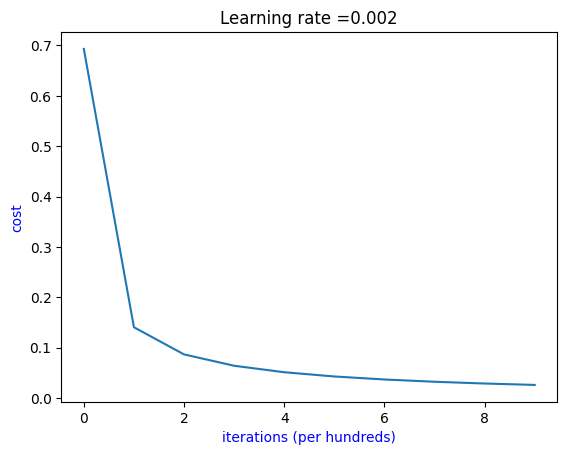

In [89]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost' ,color="blue")
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()